# Visualizing Earnings Based On College Majors

In this analysis we will be looking at a recent grad dataset to create scatter plots, histograms, scatter matrix plot, and bar graphs using the data. Using this data, we will explore the relationships between median salaries, number of men, number of women, unemployment rate, sample size, and the share of women in each major.

In order to explore these relationships visually we first need to import the dataframe and other tools we need to make the magic happen.

In [91]:
import pandas as pd
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")


# Let's get an understanding of what kind of dataframe we are looking at
print(recent_grads.iloc[1],'\n\n\n') 
print(recent_grads.head(),'\n\n\n')
print(recent_grads.tail(),'\n\n\n')
print(recent_grads.describe(),'\n\n\n')


Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

In the above print out we can see some information about our dataframe. 

The first print out is the first element, which outlines the columns that we have in our dataframe that we will need to explore further. 

The second and third print out outline the first five and last five elements of the full dataframe we will be using.

The fourth print out shows us many different statistics related to each column.

Now that we know what we are dealing with, we should clean the data to ensure accuarate results.

In [92]:
# We need to drop any NAN values from the dataframe, but first we should see how many are going to be dropped after 
# we apply the .dropna() function

raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()

cleaned_data_count = recent_grads.shape[0]

print("Raw data count = ", raw_data_count, "\n\n")
print("Cleaned data count = ", cleaned_data_count, "\n\n")

Raw data count =  173 


Cleaned data count =  172 




In the above print out we see that only one element has been dropped. This means our dataset is now ready to be examined as all elements are the type we are expecting.

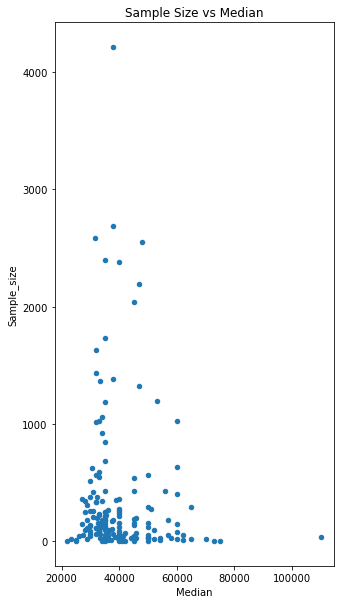

In [27]:
# Using the cleaned data, we can now start looking at the data in more depth by visualizing some relationships using
# scatter plots!

recent_grads.plot(x='Sample_size', y='Median',kind='scatter',title='Sample Size vs Median', figsize=(5,10))


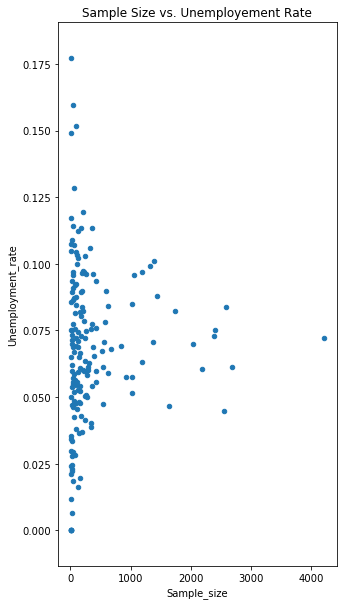

In [21]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate',kind='scatter',title='Sample Size vs. Unemployement Rate', figsize=(5,10))


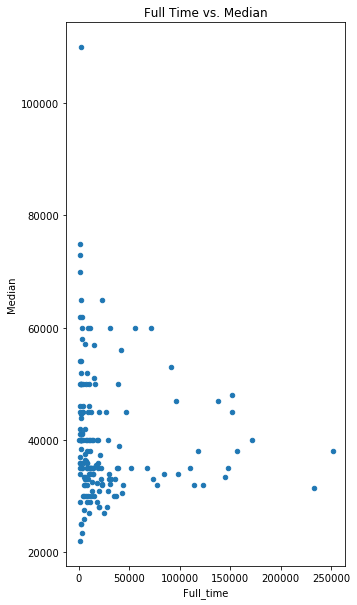

In [25]:
recent_grads.plot(x='Full_time', y='Median',kind='scatter',title='Full Time vs. Median', figsize=(5,10))


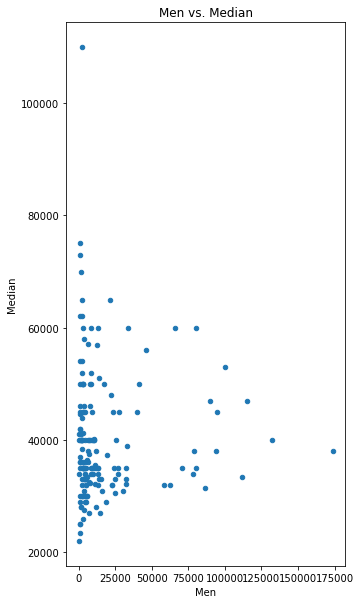

In [23]:
recent_grads.plot(x='Men', y='Median',kind='scatter',title='Men vs. Median', figsize=(5,10))


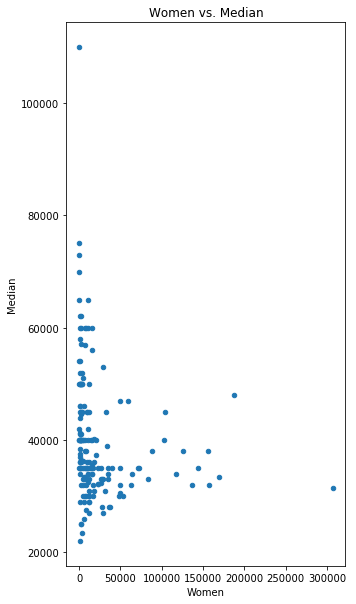

In [24]:
recent_grads.plot(x='Women', y='Median',kind='scatter',title='Women vs. Median', figsize=(5,10))

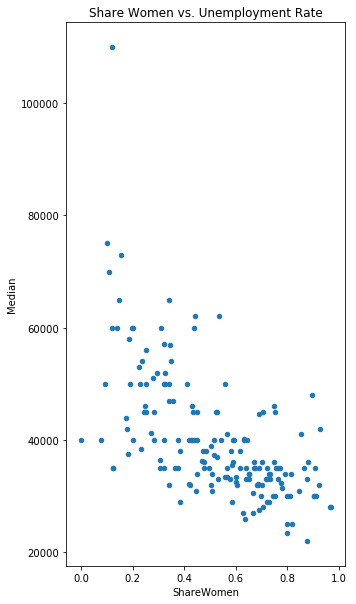

In [29]:
recent_grads.plot(x='ShareWomen', y='Median',kind='scatter',title='Share Women vs. Unemployment Rate', figsize=(5,10))

Using these plots we can answer a few questions such as:

1) Do students in more popular majors make more money?

Looking at the first scatter plot we can see that the most popular majors have a similar average around the rest of the group so we cannot say that more popular majors make more money.

2) Do students that majored in subjects that were majority female make more money?

Looking at the last graph, Median salary vs ShareWomen, we can see that the latter half >50% has a smaller average than compared to the 0-50% mark. So in the subjects where the majority were female actually make less money than that of men.

3) Is there any link between the number of full-time employees & median salary?

The only link that can be seen when looking at the graph is a horizontal distribution that is hovering right above the 40,000 median salary line.  



#### Now, let's see if we can find any interesting relationships when looking at histograms

recent_grads['Sample_size'].hist(bins=50)

40076.74418604651


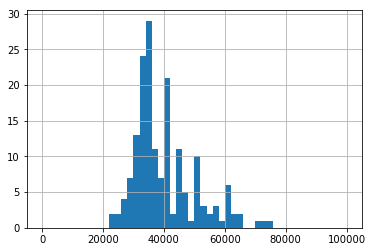

In [72]:
recent_grads['Median'].hist(bins=50,range=(0,100000))
print(recent_grads['Median'].mean())

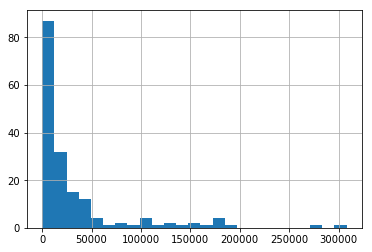

In [40]:
recent_grads['Employed'].hist(bins=25)

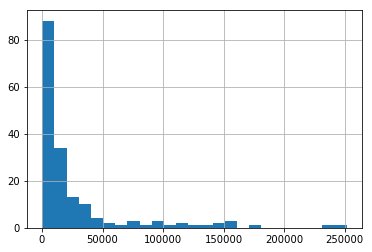

In [39]:
recent_grads['Full_time'].hist(bins=25)

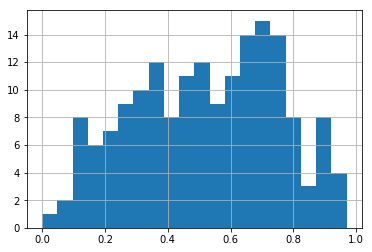

In [67]:
recent_grads['ShareWomen'].hist(bins=20)

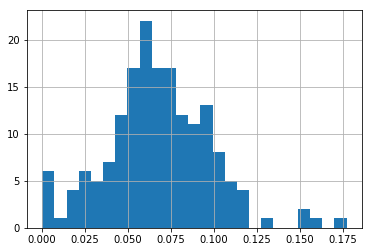

In [49]:
recent_grads['Unemployment_rate'].hist(bins=25)

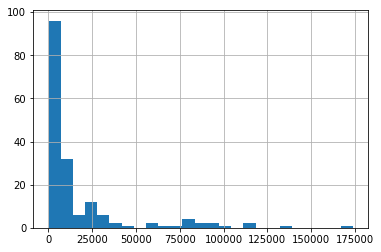

In [54]:
recent_grads['Men'].hist(bins=25)

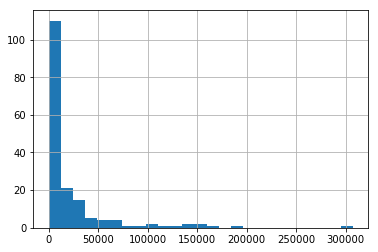

In [55]:
recent_grads['Women'].hist(bins=25)

Using the histogram plots we can now answer the following questions:

1) What percent of majors are predominantly male? Predominantly female?

We can see these values outlined in the ShareWomen distribution (graph 5). This graph shows the distribution of the percentage of women in each major. In this graphe we can see that the women have an average somewhere around the 50% mark which means that the men also have a percentage around the 50% mark. If we take the actual Mean of this value, we will find that the women have a average of 52% while the men make up 48% of the majors.

2) What's the most common median salary range?

Looking at the second graph, we can see the most common salary range is between 30,000 & 40,000. If we were to take the mean of all median salary ranges we would be 40,076. Which is right on par for what we saw!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11edde320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f1fc9e8>]], dtype=object)

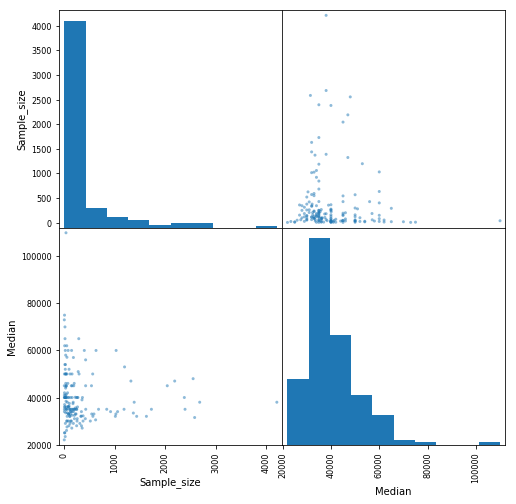

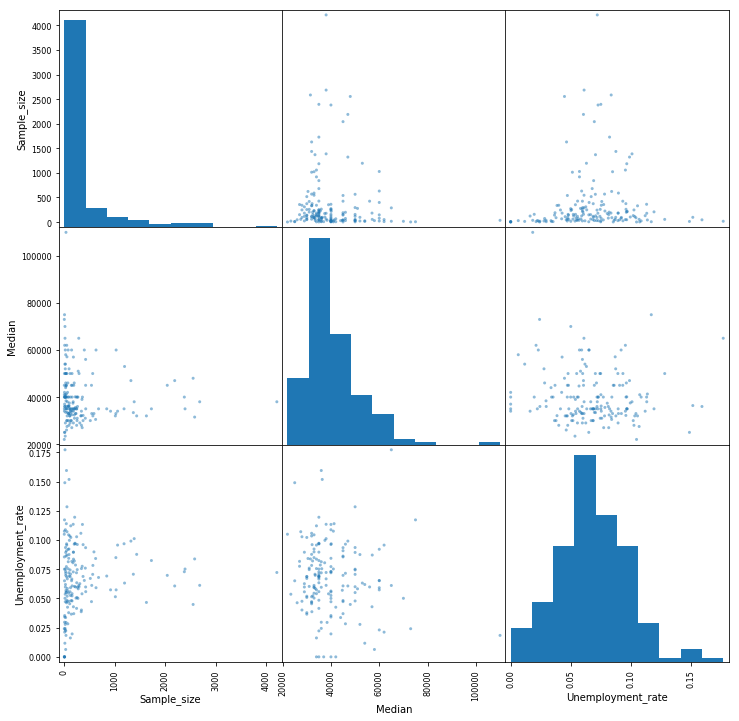

In [113]:
# Now that we have created a scatter plot & histograms using pandas, how about we combine these methods into creating
# a scatter matrix plot.

from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(8,8))
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(12,12))

Using this method gives us a brief overview of the data we are looking to analyze. This is a very important first step because once we know which relationships we want to explore in more depth we have the ability to select that graph and analyze further.

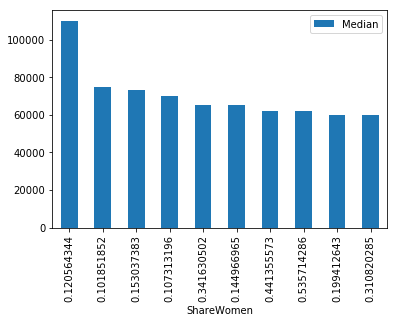

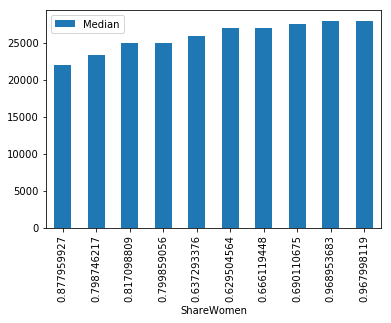

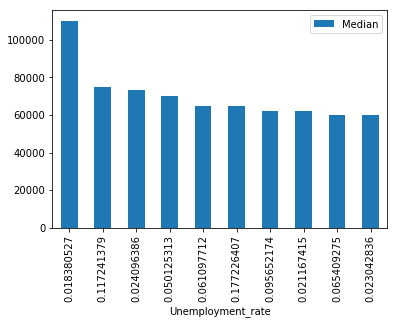

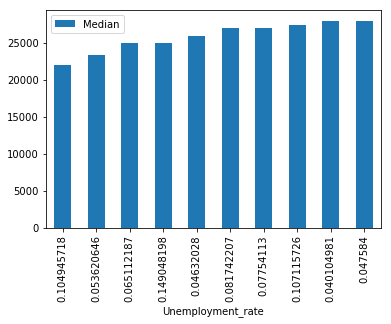

In [112]:
# Now let's explore the same data but using bar plots to see if we can see any other trends that were not obvious
# using the previous methods.

# Using the bar plots we want to explore the 10 highest paying majors to the 10 lowest paying majors using the
# ShareWomen column.

recent_grads_highest = recent_grads.sort_values(by='Median',axis=0, ascending=False)
recent_grads_lowest = recent_grads.sort_values(by='Median',axis=0, ascending=True)

# Comparing the share of women in a major vs. the median salary of that major
recent_grads_highest.head(10).plot.bar(x='ShareWomen',y='Median')
recent_grads_lowest.head(10).plot.bar(x='ShareWomen',y='Median')

# Comparing the unemployment rate in a major vs. the median salary of that major
recent_grads_highest.head(10).plot.bar(x='Unemployment_rate',y='Median')
recent_grads_lowest.head(10).plot.bar(x='Unemployment_rate',y='Median')

These bar graphs give us a different way to explore data. For example, we can see that after sorting by median values (ascending & descending) we can look at new relationships. 

The first to bar graphs outline the share of women in a given major compared against the median salaries of each major. We can quite say, with confidence, that women make up the majority of majors that have lower median earnings than that of the higher median earnings.

The second bar graph outlines the unemployment rate for each given major compared to the median salaries of each major. Looking at the top 10 and bottom 10 we can't really see a relationship between the unemployment rate and the median salary. 
